# e-Commerce and Cohort Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data

In [2]:
df = pd.read_csv('data.csv', encoding = 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
# check duplicates in the data
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

There are 5268 duplicates in the data. Let's remove those duplicates. 

In [6]:
df = df.drop_duplicates()
df.shape

(536641, 8)

The followings are the explanation of the UIC  Machine Learning Repository about each column:


* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal. 
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

## EDA

### InvoiceNo, StockCode, and CustomerID

Since the InvoiceNo which starts with the letter 'C' indicates the cancellation of the transaction, the observations of InvoiceNo with the letter 'C' are removed from the data 

In [7]:
df[df.InvoiceNo.str.contains('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [9]:
df.InvoiceNo.str.contains('C').sum()

9251

Out of 536641 observations, 9251 observations are the cancelled transactions, and they will be dropped out of the analysis.

In [10]:
df = df[~df.InvoiceNo.str.contains('C')]

Let's see the numbers of unique values for each column.

In [11]:
print("The Number of Orders:", len(df.InvoiceNo.unique()))
print("The Number of Products:", len(df.StockCode.unique()))
print("The Number of Customers:", len(df.CustomerID.unique()))

The Number of Orders: 22064
The Number of Products: 4059
The Number of Customers: 4340


Text(0.5, 1.0, 'The Numbers of Orders, Products, and Customers')

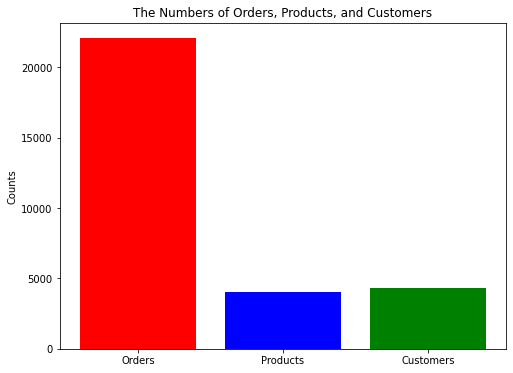

In [12]:
columns = ['Orders','Products','Customers']
values = [len(df.InvoiceNo.unique()),len(df.StockCode.unique()),len(df.CustomerID.unique())]

plt.figure(figsize=(8,6))
plt.bar(columns, values, color=['red','blue','green'])
plt.ylabel('Counts')
plt.title('The Numbers of Orders, Products, and Customers')

In [13]:
# the average orders per customer and product
avg_orders_customer = len(df.InvoiceNo.unique())/len(df.CustomerID.unique())
avg_orders_product = len(df.InvoiceNo.unique())/len(df.StockCode.unique())
print("The average orders per customer:", round(avg_orders_customer,2))
print("The average orders per product:", round(avg_orders_product,2))

The average orders per customer: 5.08
The average orders per product: 5.44


In the whole data set, the average orders per customer is 5.08, and the average orders per product is 5.44, which mean that each customer made 5.08 orders on average, and that each product was ordered 5.44 times on average. (The cancelled transcations are excluded.)

### Price and Quantity

Let's see the distribution of UnitPrice. Since the data is based on the Invoice Numbers and there are many duplicates for UnitPrice, we need to remove duplicates in UnitPrice in order to see the distribution of UnitPrice.

In [14]:
df_product = df.drop_duplicates('StockCode')
df_product['UnitPrice'].describe()

count     4059.000000
mean        10.239251
std        274.607327
min          0.000000
25%          1.250000
50%          2.510000
75%          4.250000
max      13541.330000
Name: UnitPrice, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


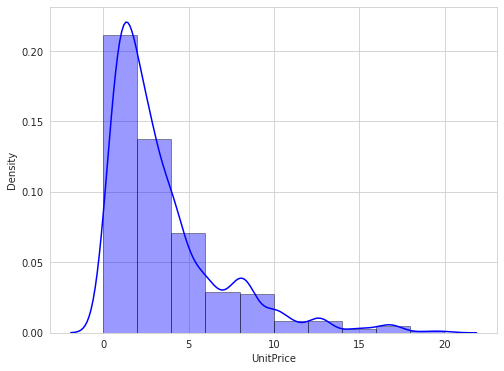

In [15]:
# The distribution of UnitPrice between 0 and 20
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.distplot(df_product[(df_product['UnitPrice']>0)&(df_product['UnitPrice']<20)]['UnitPrice'], bins=10, hist=True, norm_hist=True, kde=True, hist_kws={'edgecolor':'black'}, color='blue')

The most of products have their prices between 0 and 5. Let's see the distribution of UnitPrice in this range in more detail.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


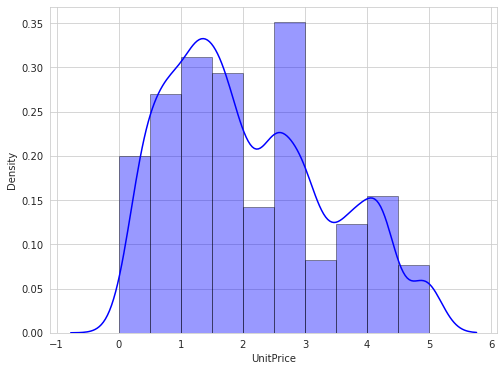

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(df_product[(df_product['UnitPrice']>0)&(df_product['UnitPrice']<5)]['UnitPrice'], bins=10, hist=True, norm_hist=True, kde=True, hist_kws={'edgecolor':'black'}, color='blue')

The prices of many products are located between 0 and 2 in the data. However, as a single bin of the price range, the range between 2.5 and 3 has the most products.

#### The Relationship between Price and Quantity

The most interesting relationship of the price of a product is between the price and the quantity ordered. Since there's no info about categories or sub-categories of products, it's hard to see the relationships between price and quantity for specific products. Here, let's see the general relationship for all products to see the negative relationship between price and quantity generally. 

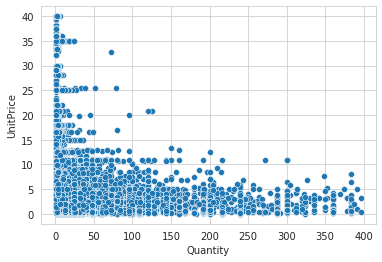

In [17]:
df_scatter = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < 40) & (df['Quantity'] > 0) & (df['Quantity'] < 400)]
sns.scatterplot(data = df_scatter,x='Quantity',y='UnitPrice')

### Country

United Kingdom    482479
Germany             9027
France              8393
EIRE                7883
Spain               2480
Netherlands         2363
Belgium             2031
Switzerland         1959
Portugal            1492
Australia           1184
Name: Country, dtype: int64

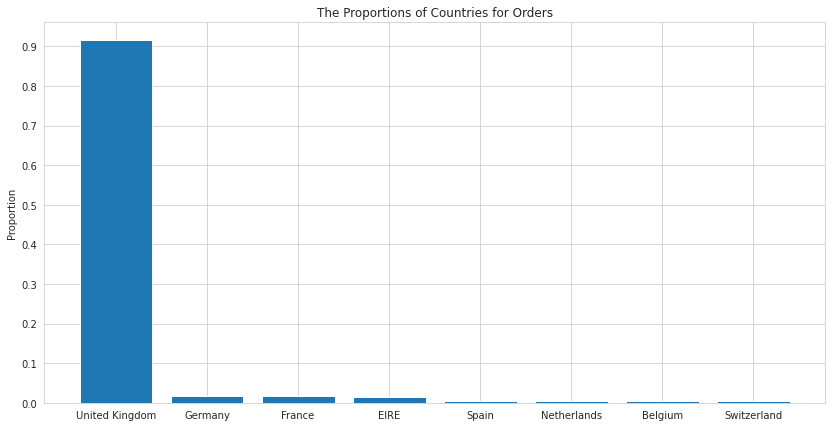

In [18]:
a = len(df.Country)
plt.figure(figsize=(14,7))
plt.bar(df.Country.value_counts().keys()[:8], (df.Country.value_counts().values/a)[:8])
plt.yticks(np.arange(0,1,0.1))
plt.ylabel('Proportion')
plt.title('The Proportions of Countries for Orders')
df.Country.value_counts()[:10]

The most of orders in the data were made by United Kingdom. Considering the efficiency and accuracy of the analysis, it is better to limit the data only to the orders made by United Kingdom. 

In [19]:
df_UK = df[df.Country == 'United Kingdom']
df_UK.shape

(482479, 8)

## Missing Values

In [20]:
import missingno as msno

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134658
Country             0
dtype: int64

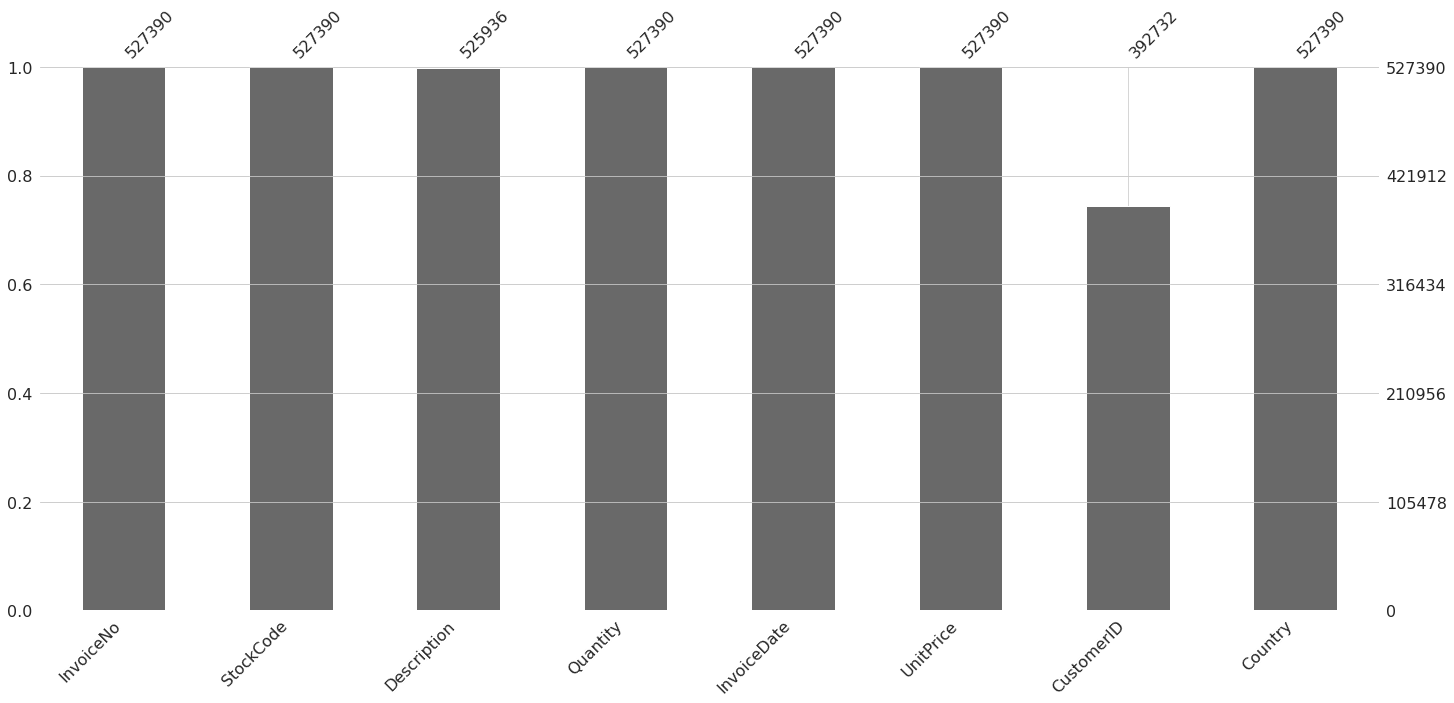

In [21]:
msno.bar(df)
df.isnull().sum()

The identification of CustomerID is essential for this analsys. Therefore, instead of replacing the missing values for alternative values, the records with missing values in CustomerID are removed from the data.

In [22]:
df = df[df['CustomerID'].notnull()]

## Cohort Analysis

In [23]:
# keep only CustomerID, InvoiceNo, and InvoiceDate and remove duplicates
df_cohort = df[['CustomerID','InvoiceNo','InvoiceDate']].drop_duplicates()
df_cohort.shape

(18566, 3)

In [24]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18566 entries, 0 to 541894
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   18566 non-null  float64
 1   InvoiceNo    18566 non-null  object 
 2   InvoiceDate  18566 non-null  object 
dtypes: float64(1), object(2)
memory usage: 580.2+ KB


In [25]:
# Convert the formate of InvoiceDate to datetime
df_cohort['InvoiceDate'] = pd.to_datetime(df_cohort['InvoiceDate']).dt.date.astype('datetime64')

In [26]:
# create Invoice Year and Month columns
df_cohort['InvoiceYear'] = pd.to_datetime(df_cohort['InvoiceDate']).dt.year
df_cohort['InvoiceMonth'] = pd.to_datetime(df_cohort['InvoiceDate']).dt.month

In [27]:
# create the columns for the year and month that each customer used the e-commerce service
df_cohort['FirstDate'] = df_cohort.groupby('CustomerID')['InvoiceDate'].transform('min')
df_cohort['FirstYear'] = pd.to_datetime(df_cohort['FirstDate']).dt.year
df_cohort['FirstMonth'] = pd.to_datetime(df_cohort['FirstDate']).dt.month

In [28]:
# create the Index column showing how more months it took for the transaction to be made since the customer first used the e-commerce service
df_cohort['Index'] = (df_cohort['InvoiceYear'] - df_cohort['FirstYear'])*12 + (df_cohort['InvoiceMonth'] - df_cohort['FirstMonth'])

In [29]:
df_index = df_cohort[['CustomerID','FirstYear','FirstMonth','Index']]

In [30]:
group_index = df_index.groupby(['FirstYear','FirstMonth','Index'], as_index=False).nunique()
group_index.rename(columns={'FirstYear':'Year', 'FirstMonth':'Month', 'CustomerID':'Counts'}, inplace=True)
group_index

,Year,Month,Index,Counts
0,2010,12,0,885
1,2010,12,1,324
2,2010,12,2,286
3,2010,12,3,340
4,2010,12,4,321
...,...,...,...,...
86,2011,10,1,86
87,2011,10,2,41
88,2011,11,0,324
89,2011,11,1,36


### Cohort Analysis Based on the Number of Customers

In [31]:
cohort_matrix = group_index.pivot(index=['Year','Month'], columns='Index', values='Counts')
cohort_matrix

Index          0      1      2      3   ...     9      10     11     12
Year Month                              ...                            
2010 12     885.0  324.0  286.0  340.0  ...  350.0  331.0  445.0  235.0
2011 1      417.0   92.0  111.0   96.0  ...  136.0  152.0   49.0    NaN
     2      380.0   71.0   71.0  108.0  ...  116.0   26.0    NaN    NaN
     3      452.0   68.0  114.0   90.0  ...   39.0    NaN    NaN    NaN
     4      300.0   64.0   61.0   63.0  ...    NaN    NaN    NaN    NaN
     5      284.0   54.0   49.0   49.0  ...    NaN    NaN    NaN    NaN
     6      242.0   42.0   38.0   64.0  ...    NaN    NaN    NaN    NaN
     7      188.0   34.0   39.0   42.0  ...    NaN    NaN    NaN    NaN
     8      169.0   35.0   42.0   41.0  ...    NaN    NaN    NaN    NaN
     9      299.0   70.0   90.0   34.0  ...    NaN    NaN    NaN    NaN
     10     358.0   86.0   41.0    NaN  ...    NaN    NaN    NaN    NaN
     11     324.0   36.0    NaN    NaN  ...    NaN    NaN    NaN    NaN
     12      41.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN

[13 rows x 13 columns]

The chart above shows how the customers who used the ecommerce service first used again the service over time. For example, the number in the first row and the first column, 885, represents the number of customers who used the service first in 2010 Dec. The number in the right side, 324, indicates how many customers used the service again in the next month out of the 885 customers. The number in the first row and the third column, 286, indicates the number of customers who used the service again after two months since the first use of the service. 

According to this chart, we are not sure how many times the each customer used the service again because each number in the chart only tells us the aggregate number of customers N months after the first use of the service. Out of 286 customers in the first row and the third column, some customers might use the service in the previous month as well or some of them might not. 

The number in the second row and the first column, 417, is the number of customers who used the service first in 2011 Jan. 92, which is on the right side of 417, indicates the number of the customers who used it again in the next month out of 417 customers. 

According to the first column, we can see the change in the number of new customers over time. In order to see the change more clearly, let's draw the graph for this.

In [32]:
year_month = np.arange('2010-12', '2012-01', dtype='datetime64[M]')

Text(0.5, 1.0, 'The Number of New Customers Over Time (2010-12 to 2011-12)')

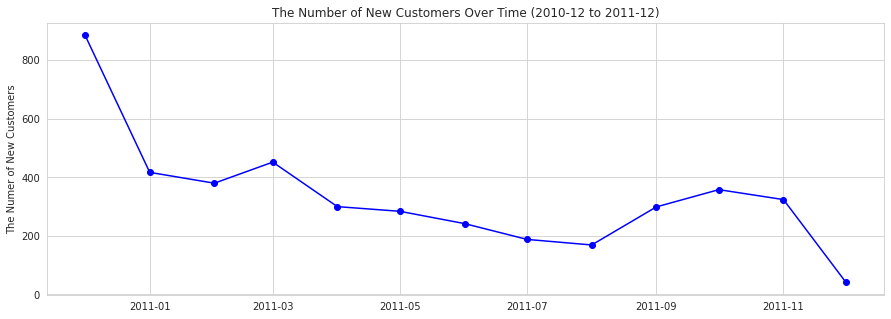

In [33]:
plt.figure(figsize=(15,5))
plt.plot(year_month, cohort_matrix.iloc[:,0].values, color='b', marker='o')
plt.ylabel('The Numer of New Customers')
plt.title('The Number of New Customers Over Time (2010-12 to 2011-12)')

The number of new customers seems to keep decreasing even if there are a couple of temporary risings during the period.

### Cohort Analysis Based on the Retention Rate

In [34]:
denominator = cohort_matrix.iloc[:,0]

In [35]:
retention_rate = cohort_matrix.div(denominator, axis=0).round(3).multiply(100, axis=0)
retention_rate

Index          0     1     2     3     4   ...    8     9     10    11    12
Year Month                                 ...                              
2010 12     100.0  36.6  32.3  38.4  36.3  ...  35.4  39.5  37.4  50.3  26.6
2011 1      100.0  22.1  26.6  23.0  32.1  ...  30.0  32.6  36.5  11.8   NaN
     2      100.0  18.7  18.7  28.4  27.1  ...  24.7  30.5   6.8   NaN   NaN
     3      100.0  15.0  25.2  19.9  22.3  ...  27.9   8.6   NaN   NaN   NaN
     4      100.0  21.3  20.3  21.0  19.7  ...   7.3   NaN   NaN   NaN   NaN
     5      100.0  19.0  17.3  17.3  20.8  ...   NaN   NaN   NaN   NaN   NaN
     6      100.0  17.4  15.7  26.4  23.1  ...   NaN   NaN   NaN   NaN   NaN
     7      100.0  18.1  20.7  22.3  27.1  ...   NaN   NaN   NaN   NaN   NaN
     8      100.0  20.7  24.9  24.3  12.4  ...   NaN   NaN   NaN   NaN   NaN
     9      100.0  23.4  30.1  11.4   NaN  ...   NaN   NaN   NaN   NaN   NaN
     10     100.0  24.0  11.5   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
     11     100.0  11.1   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
     12     100.0   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN

[13 rows x 13 columns]

Text(87.0, 0.5, '')

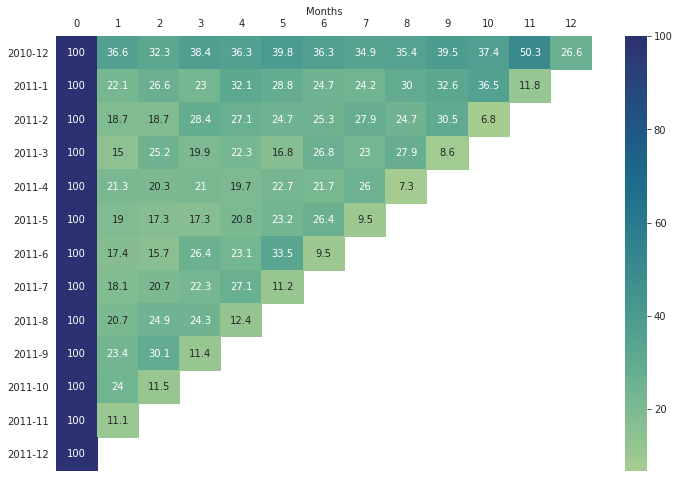

In [36]:
plt.figure(figsize=(12,8))
ax =sns.heatmap(data=retention_rate, annot=True, cmap='crest', fmt='g')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
ax.xaxis.set_label_position('top')
ax.set_xlabel('Months')
ax.set_ylabel('')

There are a couple of things to mention for the chart above. 

1) **The retention rates are the highest for those who used the service first in 2010 Dec.** The retention rates for all months for those who used the service first in 2010 Dec are above 30% while those who used the service first later than 2010 Dec have lower than 30% of the retention rate for several months. 

2) **For the row for 2010-12, the retention rate for 11th month (11th column) is about 50% while the retention rates for other months are lower than 40%.** The 11th month for the first row is **November 2011**. This tendency also seems to be shown in the other rows as well. For example, for the row for 2011-01, the tenth month, which is November in 2011, has the highest retention rate, 36.5%. For the row for 2011-02, the ninth month (November 2011) has the highest retention rate, 30.5%.        

## Final Thoughts

Here, I implemented the cohort analysis using the UK e-commerce data set. Cohort analysis is a useful tool to see the pattern or behavior of customers, which are in the same cohort, over time. 